In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets

import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import plotly
import plotly.express as px 

import scipy
print(device)

cuda:0


In [2]:
transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5), (0.5))])

In [3]:
train_data = torchvision.datasets.STL10(root='./data',
                                               transform=transforms,
                                               download=True)
test_data = torch.utils.data.Subset(train_data, range(5000, 13000))
train_data = torch.utils.data.Subset(train_data, range(5000))

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting ./data/stl10_binary.tar.gz to ./data


In [4]:
train_loader = DataLoader(train_data,
                          batch_size=128,
                          shuffle=True,
                          num_workers=0)
test_loader = DataLoader(train_data,
                          batch_size=128,
                          shuffle=True,
                          num_workers=0)

In [5]:
img, label = next(iter(train_loader))
print(img.size())
print(img.type())

torch.Size([128, 3, 96, 96])
torch.FloatTensor


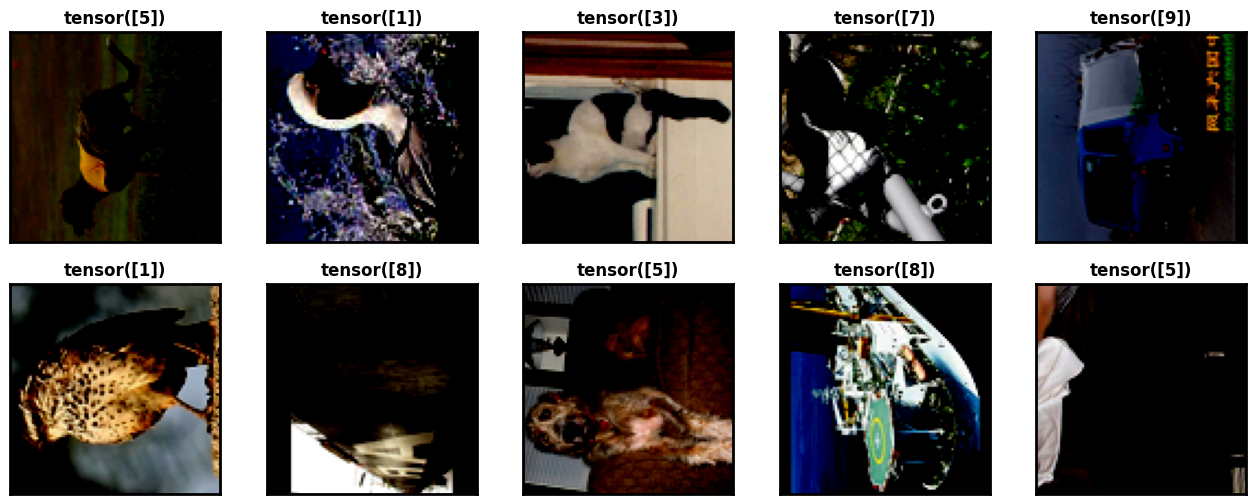

torch.Size([3, 96, 96])


In [6]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
axes = axes.flatten()
for i in range(10):
    axes[i].imshow(img[i].numpy().swapaxes(0, 2))

    axes[i].set_title(label[i].unique(), fontweight='bold')
    axes[i].spines[['top', 'bottom', 'left', 'right']].set_color('black')
    axes[i].spines[['top', 'bottom', 'left', 'right']].set_linewidth(2)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()
print(img[3].shape)

In [7]:
class AlexNet(nn.Module):
    def __init__(self, drop_out=True):
        super(AlexNet, self).__init__()
        self.convlayer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6,6))
        if drop_out:
          self.fc1 = nn.Sequential(
              nn.Dropout(0.5),
              nn.Linear(256*6*6, 4096),
              nn.ReLU(inplace=True),
              nn.Dropout(0.5),
              nn.Linear(4096, 512),
              nn.ReLU(inplace=True),
              nn.Linear(512, 10)
          )
        else:
          self.fc1 = nn.Sequential(
            nn.Linear(256*6*6, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)
          )
    def forward(self, x):
        x = self.convlayer(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x

model = AlexNet()
model2 = AlexNet(drop_out=False)
model.to(device)
model2.to(device)

AlexNet(
  (convlayer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (fc1): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in

In [8]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
optimizer2 = optim.Adam(model2.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

84.40248203277588
74.9617395401001
70.31923913955688
67.10379481315613
64.6600706577301
62.06435215473175
60.029377460479736
55.877944588661194
54.13147574663162
53.34144580364227
51.322805523872375
48.27907347679138
47.34327131509781
45.748775601387024
43.584756314754486
39.49552062153816
35.512533485889435
33.09160327911377
31.118292599916458
27.512074798345566
25.151624590158463
25.487106025218964
21.89482668042183
18.89411160349846
16.953882232308388
14.286724269390106
11.757335156202316
16.05569562315941
18.05864106118679
9.675628423690796
15.660105243325233
9.904364682734013
6.925579976290464
6.325760722160339
7.405625112354755
9.015703616663814
5.741361152380705
6.147054893895984
4.27381344884634
2.833751124329865
5.470073567703366
6.733673453330994
11.93294657766819
28.849002689123154
11.753817230463028
14.223204597830772
4.718268504366279
6.814514521509409
3.5645963554270566
1.643410083372146
3.5481411868240684
5.284056186676025
6.126725903712213
2.3803653088398278
6.603054888

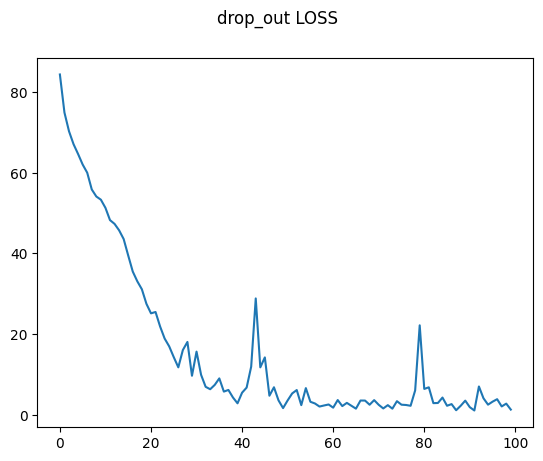

In [9]:
model.train()
epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_in, batch_out in train_loader:
        batch_in, batch_out = batch_in.to(device), batch_out.to(device)
        y_pred = model(batch_in)
        loss = criterion(y_pred, batch_out)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    losses.append(running_loss)
    print(running_loss)
    running_loss = 0.0

plt.plot(losses)
plt.suptitle('drop_out LOSS')
plt.show()

In [10]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
      for batch_in, batch_out in test_loader:
        batch_in, batch_out = batch_in.to(device), batch_out.to(device)
        outputs = model(batch_in)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_out.size(0)
        correct += (predicted == batch_out).sum().item()
print(100 * correct / total)

99.24


In [11]:
model.train()
epochs = 100
losses2 = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_in, batch_out in train_loader:
        batch_in, batch_out = batch_in.to(device), batch_out.to(device)
        y_pred = model2(batch_in)
        loss2 = criterion(y_pred, batch_out)
        
        optimizer2.zero_grad()
        loss2.backward()
        optimizer2.step()
        
        running_loss += loss2.item()
    losses2.append(running_loss)
    print(running_loss)
    running_loss = 0.0

92.03204941749573
80.87378656864166
75.09134566783905
70.77583539485931
65.5693039894104
63.641376972198486
60.09805607795715
58.37721395492554
56.57674312591553
53.387510657310486
50.23900902271271
47.57226425409317
45.98643916845322
44.50436055660248
41.21934515237808
40.36107939481735
36.08264398574829
36.52208012342453
32.26067107915878
29.43291312456131
24.554884016513824
24.38373926281929
19.551473379135132
15.858142100274563
17.628830671310425
14.798314049839973
14.5969939827919
20.534594476222992
15.820193529129028
16.844409719109535
10.653074383735657
14.231347769498825
6.946335387416184
4.980250747874379
4.599431752227247
4.69834191352129
5.585634168237448
9.5028759483248
3.722931222990155
1.545585521031171
2.927457958459854
5.260932789184153
3.8239951580762863
34.32326462864876
9.536015920341015
6.0206592390313745
2.810285657644272
1.7335073521826416
9.775280825793743
3.8157020984217525
2.2620599037618376
0.9478912967606448
0.7227831000345759
2.3718280205503106
3.12717146938

In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
      for batch_in, batch_out in test_loader:
        batch_in, batch_out = batch_in.to(device), batch_out.to(device)
        outputs = model2(batch_in)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_out.size(0)
        correct += (predicted == batch_out).sum().item()
print(100 * correct / total)

99.18


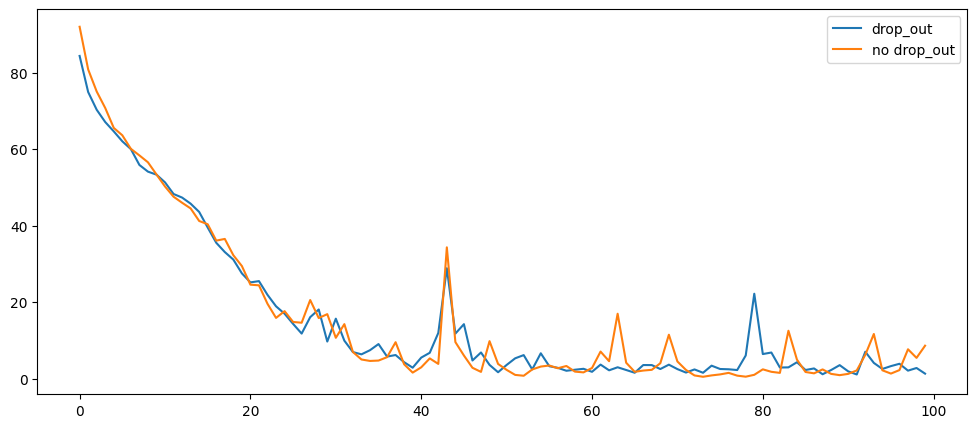

In [13]:
fig, axes = plt.subplots(1,1, figsize=(12,5))
axes.plot(losses, label='drop_out')
axes.plot(losses2, label='no drop_out')
axes.legend()
plt.show()